Counter({1: 2304, 0: 2304})


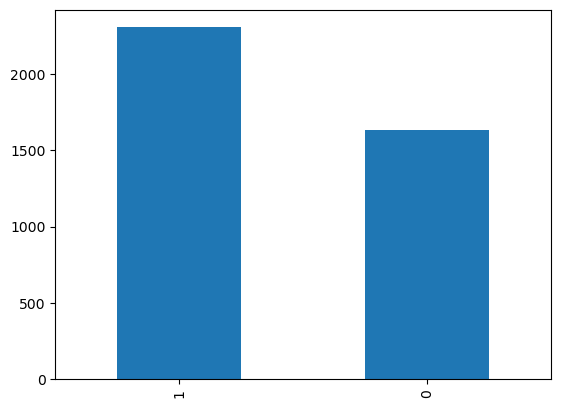

In [6]:
import pandas as pd
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
#from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error



df = pd.read_csv('csc499dataset.csv')
X=df[['Sex','AgeGroup','programme_code','Semester1','Semester2','Semester3',
      'Semester4','Semester5','Semester6','Semester7','Semester8']]
#print(X)
#df.head(10)
Y=df["GRADUATED"]
XX=X.values
YY=Y.values
df["GRADUATED"].value_counts().plot(kind='bar')
regressor=DecisionTreeRegressor(random_state=0)

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(XX,YY,test_size=0.1,random_state=0)
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
oversample = RandomOverSampler(sampling_strategy='minority')

X_over, Y_over = oversample.fit_resample(XX, YY)
print(Counter(Y_over))


In [9]:
regressor.fit(X_train,Y_train)
pred=regressor.predict(X_test)
precision = precision_score(Y_test,pred.round())
recall = recall_score(Y_test,pred.round())
accuracy=accuracy_score(Y_test,pred.round())
f1=f1_score(Y_test,pred.round())
#y_pred_proba = regressor.predict_proba(X_test)[::,1]
#auc=metrics.roc_auc_score(Y_test,y_pred_proba)
mse = mean_squared_error(Y_test, pred)

print('Precision: ',precision)
print('Recall:',recall)
print('Accuracy:',accuracy)
print('F1 score:',f1)
print("Mean Squared Error:", mse)
#print('AUC',auc)
#print(classification_report(pred,Y_test))

Precision:  0.8701298701298701
Recall: 0.8701298701298701
Accuracy: 0.8477157360406091
F1 score: 0.8701298701298701
Mean Squared Error: 0.14722574732092497


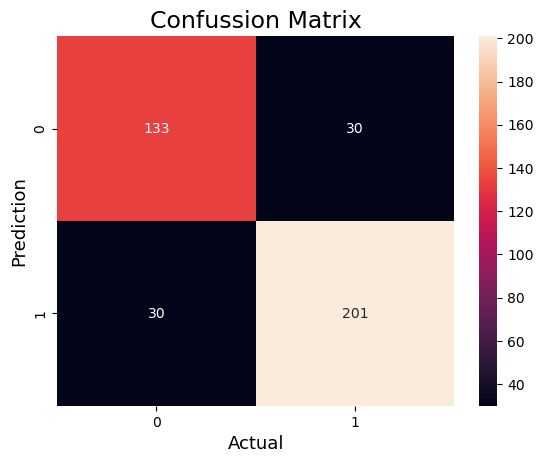

In [10]:
cm= confusion_matrix(Y_test,pred.round())
sns.heatmap(cm,annot=True,fmt='g')
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confussion Matrix', fontsize=17)
plt.show()


(process:15928): GLib-GIO-WARNING **: 19:31:18.604: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.7.9.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs

(process:15928): GLib-GIO-WARNING **: 19:31:18.657: Unexpectedly, UWP app `Microsoft.ScreenSketch_11.2306.44.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ScreenSketch_8wekyb3d8bbwe!App') supports 29 extensions but has no verbs



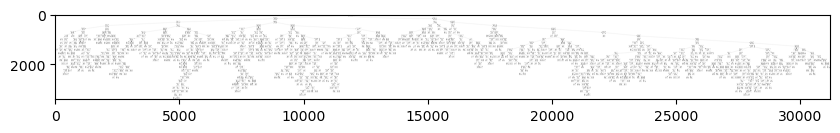

In [11]:
dtree=DecisionTreeClassifier()
dtree=dtree.fit(X,Y)
data=tree.export_graphviz(dtree,out_file=None,feature_names=X.columns.values)
graph=pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png')
plt.figure(figsize=(10,15))
img=plt.imread('mydecisiontree.png')
plt.imshow(img)